In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [3]:
# 1. Construct the transfer matrix at temperature T with external field B .
kb = 1
J  = 1
def bata(T):
    return 1/(T*kb)
def transfermatrix(T,B):
    b=bata(T)
    return np.array([[np.exp(b*J+b*B),np.exp(-b*J)   ],
                     [np.exp(-b*J)   ,np.exp(b*J-b*B)]])
print (transfermatrix(2,1))

[[2.71828183 0.60653066]
 [0.60653066 1.        ]]


In [4]:
# 2. Find the eigenvalues of the transfer matrix and compare to the exact results.
def eigenvalues(T,B):
    return np.linalg.eigvalsh(transfermatrix(T,B))
def exact_results(T,B): 
    b       = bata(T)
    lamda_p = np.exp(b*J)*(np.cosh(b*B)+(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5) #plus
    lamda_m = np.exp(b*J)*(np.cosh(b*B)-(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5) #minus
    return np.array([round(lamda_m,8),round(lamda_p,8)])
T,B= 2, 1
print ("from transfer matrix ",  eigenvalues(T,B))
print ('from  exact  results ',exact_results(T,B))

from transfer matrix  [0.80747436 2.91080747]
from  exact  results  [0.80747436 2.91080747]


In [5]:
# 3. Evaluate the partition function Z at different system size N and T, B. 
#    Compare to the exact results.
impurity_matrix = np.array([[1, 0],
                            [0,-1]]) 
def Z(N,T,B):
    x = transfermatrix(T,B)
    y = np.copy(x)
    for i in np.arange(N-1):
        x = np.dot(x,y)
    return np.trace(x)

N,T,B=5,2,1
print ('N=%i' %(N))
print ("partition funtion %.3e" %Z(N,T,B))
print ("lamda_plus+lamda_minus  %.3e" %sum(eigenvalues(T,B)**N))
print ('lamda_plus  %.3e' %eigenvalues(T,B)[1]**N)
N,T,B=100,2,1
print ('N=%i' %(N))
print ("partition funtion  %.3e " %Z(N,T,B))
print ("lamda_plus+lamda_minus  %.3e " %sum(eigenvalues(T,B)**N))
print ('lamda_plus %.3e' %eigenvalues(T,B)[1]**N)
print ('in large N , we can see lamda_plus+lamda_minus == lamda_plus')

N=5
partition funtion 2.093e+02
lamda_plus+lamda_minus  2.093e+02
lamda_plus  2.090e+02
N=100
partition funtion  2.520e+46 
lamda_plus+lamda_minus  2.520e+46 
lamda_plus 2.520e+46
in large N , we can see lamda_plus+lamda_minus == lamda_plus


In [6]:
# 4. For a fixed N, T, B, evaluate [S0,Sj], where j=0,1,.... N.
N ,T ,B = 2, 5 ,10
i ,j    = 0,1 
def S(i,j):
    a =np.eye(2)
    for k in np.arange(N):
        if k == i:
            a = np.dot(a,impurity_matrix)       #$T_z$     
        if k == j:
            a = np.dot(a,impurity_matrix)
        a = np.dot(a,transfermatrix(T,B))
    a = np.trace(a)/Z(N,T,B)
    return a
for j in np.arange(0,N):
    print ("j = %.i " %j,"%.3e" %S(i,j))

j = 0  1.000e+00
j = 1  9.676e-01


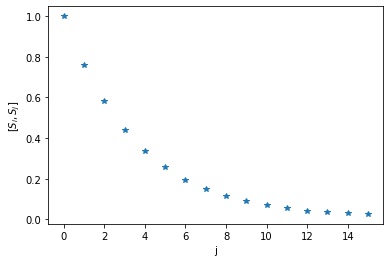

In [7]:
#5.(a) Plot [S0,Sj] up to j = N/2 and show that it decays exponentially.
#      Please try several $N$, $T$, $B$. 
N ,T ,B ,i  = 32 ,1.  ,0., 0
s = [S(i,j) for j in np.arange(0,N)]
s.append(s[0])
plt.ylabel('$[S_i,S_j]$')
plt.xlabel('j')
plt.plot(s[0:int(N/2)],'*')

about N = 600


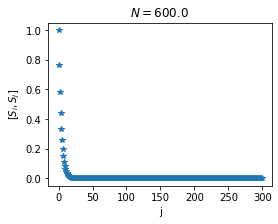

In [8]:
#5.(b) What is the largest $N$ you can go? 
N ,T ,B ,i  = 600 ,1.  ,0., 0
s = [S(i,j) for j in np.arange(0,N)]
plt.figure(figsize=(4,3))
plt.title("$N=%.1f$" %(N))
plt.ylabel('$[S_i,S_j]$')
plt.xlabel('j')
plt.plot([S(i,j) for j in np.arange(0,N/2)],'*')
print ("about N = 600")

when T < 0.5 , they will decay quickly.
and T < 0.2 , its value mostly same


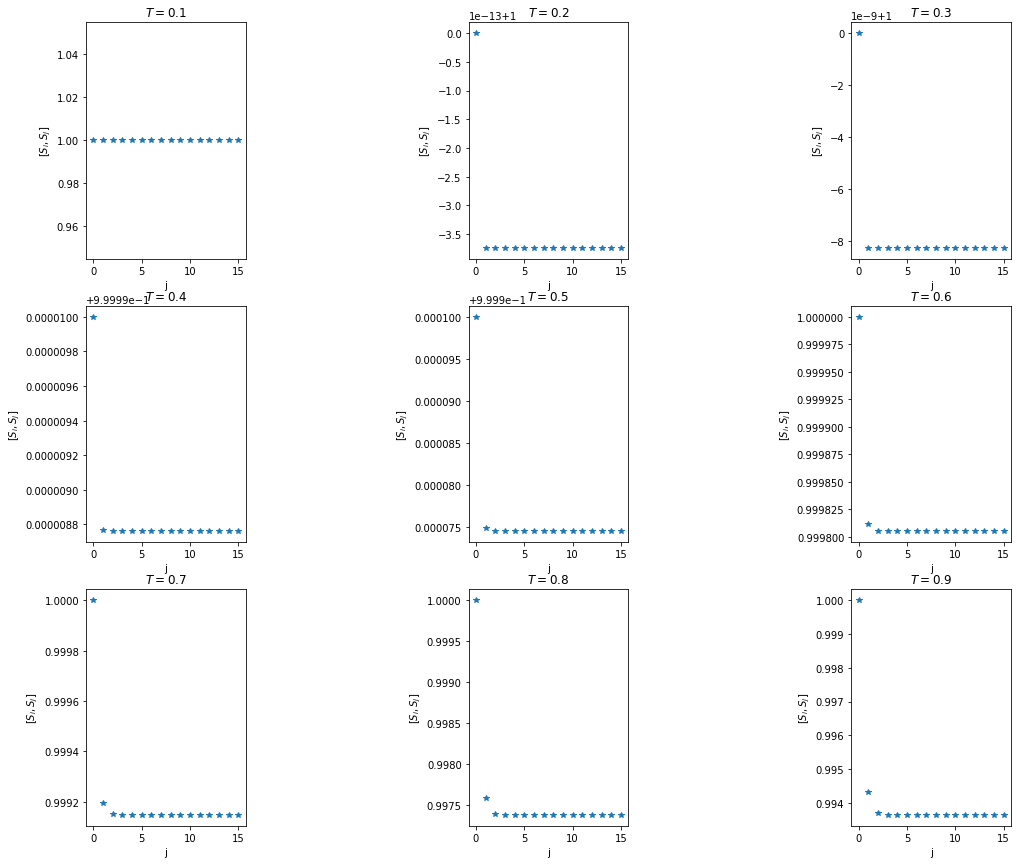

In [16]:
#5.(c) What is the lowest $T$ you can go?
N ,B ,i  = 32 ,1., 0
s = [S(i,j) for j in np.arange(0,N)]
s.append(s[0])
plt.figure(figsize=(20,20))
for k in np.arange(0.1,1,0.1):
    T = k
    plt.subplot(4,6,int(k*20))
    plt.ylabel('$[S_i,S_j]$')
    plt.xlabel('j')
    plt.title("$T=%.1f$" %(k))
    plt.plot([S(i,j) for j in np.arange(0,N/2)],'*')

print ("when T < 0.5 , they will decay quickly.")
print('and T < 0.2 , its value mostly same')